Import modules

In [2]:
import numpy as np
import scipy.stats
from matplotlib import pyplot

# 1. Uniform random variable

Generate $\text{Uniform}(0,1)$ random variables:

In [ ]:
scipy.stats.uniform.rvs(size=10)

array([0.39947886, 0.44263175, 0.1666673 , 0.60608292, 0.08129213,
       0.29164871, 0.04763335, 0.25659916, 0.89474312, 0.24376516])

Generate $\text{Uniform}(a,b)$ using $\text{Uniform}(0,1)$:

In [ ]:
a, b = 4, 8
a + (b-a) * scipy.stats.uniform.rvs(size=10)

array([7.03600635, 7.33394999, 7.82803098, 4.1776628 , 7.90794073,
       5.04070438, 7.66171485, 7.62156055, 4.68929616, 6.2876807 ])

Generate $\text{Uniform}(a,b)$ using location & scale parameters

In [ ]:
scipy.stats.uniform.rvs(a, b-a, size=10)

array([6.97279011, 7.94256165, 7.86172312, 6.83662972, 5.06726613,
       4.36448781, 6.0984731 , 7.48334644, 7.21005135, 7.03790431])

Compute mean and variance of $\text{Uniform}(a,b)$

In [ ]:
Xs = scipy.stats.uniform.rvs(a, b-a, size=10000 )
print( "sample minimum = %f, minimum = %f" % ( Xs.min(), a ) )
print( "sample maximum = %f, maximum = %f" % ( Xs.max(), b ) )
print( "sample average = %f, mean = %f" % ( Xs.mean(), (a+b)/2 ) )
print( "sample variance = %f, variance = %f" % ( Xs.var(), (b-a)**2/12) )

sample minimum = 4.000433, minimum = 4.000000
sample maximum = 7.999751, maximum = 8.000000
sample average = 5.996541, mean = 6.000000
sample variance = 1.339258, variance = 1.333333


Plot histogram and pdf:

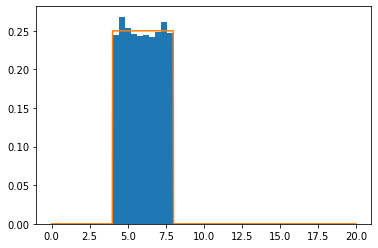

In [ ]:
pyplot.hist( Xs, density=True )

values = np.linspace( 0, 20, 1000 )
pdfs = scipy.stats.uniform.pdf(values, a, b-a)
pyplot.plot( values, pdfs )

# 2. Exponential random variable

Generate exponential random variables $\text{Exponential}(\lambda)$, calculate mean and variance, and plot histogram:

generated random variables = [0.02675638 0.0493566  0.41455144 ... 1.0195984  1.31809435 0.08195579]
sample average = 0.336617, mean = 0.333333
sample variance = 0.110718, variance = 0.111111


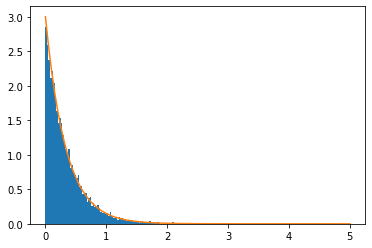

In [ ]:
lambda_ = 3
Xs = scipy.stats.expon.rvs(scale=1/lambda_, size=10000)
print( "generated random variables =", Xs )
print( "sample average = %f, mean = %f" % ( Xs.mean(), 1/lambda_ ) )
print( "sample variance = %f, variance = %f" % ( Xs.var(), 1/lambda_**2 ) )

values = np.linspace( 0, 5, 200 )
pyplot.hist( Xs, bins=values, density=True )
pdfs = scipy.stats.expon.pdf(values, scale=1/lambda_)
pyplot.plot( values, pdfs )

Numerical verification of Exercise (1) in p.12:

In [ ]:
lambda_, t = 0.1, 2

Xs = scipy.stats.expon.rvs(scale=1/lambda_, size=10000)
print( "E[(X-t)+] = %f vs %f" % (np.maximum(Xs-t,0).mean(), np.exp(-lambda_*t)/lambda_) )
print( "E[max(X,t)] = %f vs %f" % (np.maximum(Xs,t).mean(), t+np.exp(-lambda_*t)/lambda_) )
print( "E[min(X,t)] = %f vs %f" % (np.minimum(Xs,t).mean(), 1/lambda_-np.exp(-lambda_*t)/lambda_) )

E[(X-t)+] = 8.137266 vs 8.187308
E[max(X,t)] = 10.137266 vs 10.187308
E[min(X,t)] = 1.809203 vs 1.812692


Numerical verification of Exercise (2) in p.13:

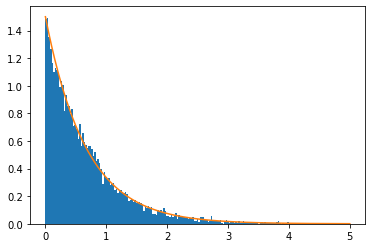

In [ ]:
lambdax, lambday = 1, 0.5
Xs = scipy.stats.expon.rvs(scale=1/lambdax, size=10000)
Ys = scipy.stats.expon.rvs(scale=1/lambday, size=10000)

values = np.linspace( 0, 5, 200 )
pyplot.hist( np.minimum(Xs, Ys), bins=values, density=True )
pdfs = scipy.stats.expon.pdf(values, scale=1/(lambdax+lambday))
pyplot.plot( values, pdfs )

# 3. Normal random variable

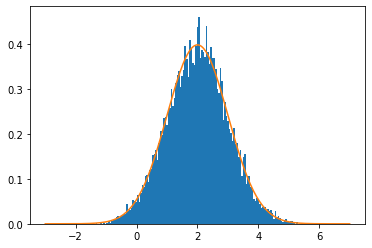

In [ ]:
mu, sigma = 2, 1
Xs = scipy.stats.norm.rvs(mu, sigma, size=10000)

values = np.linspace( mu-5*sigma, mu+5*sigma, 200 )
pyplot.hist( Xs, bins=values, density=True )

pdfs = scipy.stats.norm.pdf( values, mu, sigma )
pyplot.plot( values, pdfs )

# 4. Inverse Transformation Method

Generate exponential random variables using inverse transformation method: $X = -\log(1-U)/\lambda$

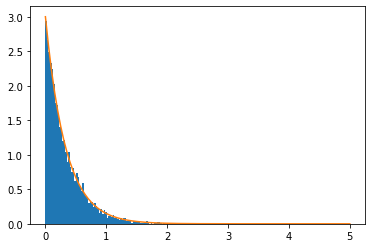

In [ ]:
Us = scipy.stats.uniform.rvs(size=10000)
Xs = -np.log(1-Us)/lambda_

values = np.linspace( 0, 5, 200 )
pyplot.hist( Xs, bins=values, density=True )
pdfs = scipy.stats.expon.pdf(values, scale=1/lambda_)
pyplot.plot( values, pdfs )

Generate normal random variables using inverse transformation method: we can compute $F^{-1}(x)$ using scipy.stats.norm.ppf()

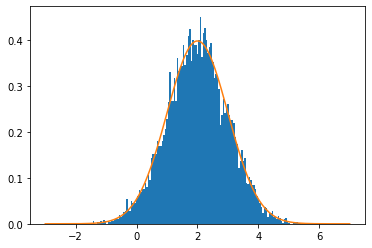

In [6]:
mu, sigma = 2, 1
Us = scipy.stats.uniform.rvs(size=10000)
Xs = scipy.stats.norm.ppf( Us, loc=mu, scale=sigma )

values = np.linspace( mu-5*sigma, mu+5*sigma, 200 )
pyplot.hist( Xs, bins=values, density=True )
pdfs = scipy.stats.norm.pdf(values, loc=mu, scale=sigma )
pyplot.plot( values, pdfs )